In [1]:
"""
Image classification using PyTorch
"""
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import numpy as np

import cv2
from imutils import paths
import argparse
import os

fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [2]:
# 1.creating a video object
video = cv2.VideoCapture(0) 
mydel = 1
a = 0 

while True:    
    a = a + 1
    check, frame = video.read() #Create a frame object
    
    # Continously show real time streaming video
    cv2.imshow("Capturing",frame)

    key = cv2.waitKey(mydel)
    if key == ord('q'):
        break
    # push image to PyTorch processing
    showPic = cv2.imwrite('C:\\Users\\seeho\\Documents\\GitHub\\Cam_PicFilter\\ImageSegmentation\\Peter'+str(a)+'.png',frame)
# 8. shutdown the camera
video.release()
cv2.destroyAllWindows 

<function destroyAllWindows>

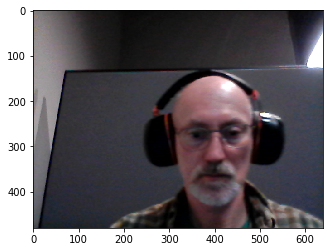

In [9]:
img = Image.open('./Peter1.png')
#img = Image.open('./img-social-share.jpg')
plt.imshow(img); plt.show()

In [10]:
# Apply the transformations needed
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [11]:
# Pass the input through the net
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


In [12]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[ 0 15]


In [13]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

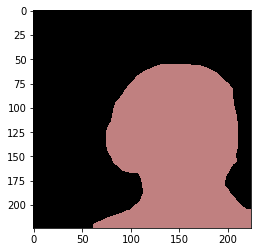

In [14]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()